In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the CSV file
file_path = 'Data.csv'  # Update this with your actual file path
df = pd.read_csv(file_path, sep=';').T
headers = df.iloc[0]
df  = pd.DataFrame(df.values[1:], columns=headers)
df_filtered = df.loc[df['Szenario'].isin(["Web(Patrick)","VR(Patrick)"])]

In [4]:
values = ["VR Experience","Navigation", "Information", "Immersive", "Engaging", "Fun", "Exploration", "Diversity"]

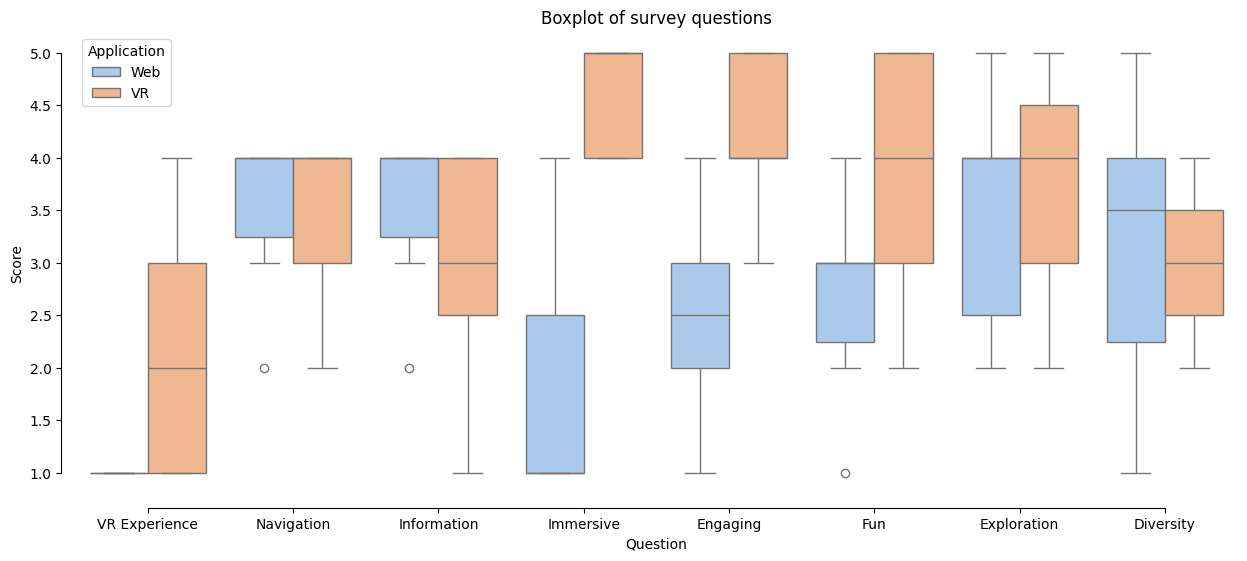

In [5]:
df_long = df_filtered.melt(id_vars='Szenario', 
                  value_vars=values, 
                  var_name='Question', 
                  value_name='Score')
df_long['Score'] = pd.to_numeric(df_long['Score'])
# Create the boxplot
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_long, x='Question', y='Score', hue='Szenario', palette=sns.color_palette("pastel",2))
plt.title('Boxplot of survey questions')
sns.despine(offset=10, trim=True)
# change plot legend
plt.legend(title='Application')
# change plot handle 
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(loc='upper left', handles=handles[0:], labels=["Web", "VR"], title='Application')
plt.show()

In [6]:
df.loc[df['Szenario'].isin(["VR(Patrick)"])]

pd.to_numeric(df.loc[df['Szenario'].isin(["VR(Patrick)"])]["VR Experience"]).mean()

2.142857142857143

In [7]:
desc_vr = df.loc[df['Szenario'].isin(["VR(Patrick)"])]["Path Description"]
desc_web = df.loc[df['Szenario'].isin(["Web(Patrick)"])]["Path Description"]
vr_desc_lengths = []
web_desc_lengths = []
for i in [4, 6, 10, 12, 16, 18, 22]:
    value = desc_vr[i]
    # if value isnt string
    if not isinstance(value, str):
        vr_desc_lengths.append(0)
    else:
        vr_desc_lengths.append(len(value))
for i in [0, 2, 9, 15, 21, 25,31]:
    web_desc_lengths.append(len(desc_web[i]))
vr_desc_lengths = np.sort(vr_desc_lengths)
web_desc_lengths = np.sort(web_desc_lengths)

In [8]:
print(vr_desc_lengths)
print(web_desc_lengths)

[  0  62  66  67 176 190 315]
[105 111 144 182 221 255 327]


{'x': [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6], 'y': array([105, 111, 144, 182, 221, 255, 327,   0,  62,  66,  67, 176, 190,
       315]), 'type': ['Web', 'Web', 'Web', 'Web', 'Web', 'Web', 'Web', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR']}


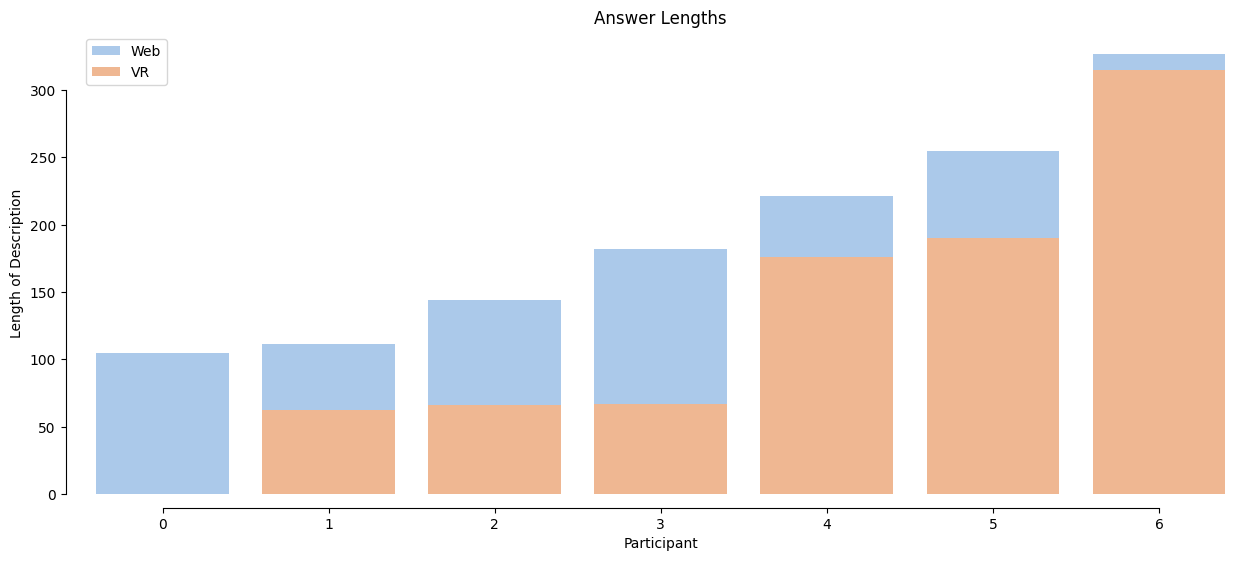

In [12]:
# plot both vr_desc lengths and web_desc lengths with seaborn as an overlapping plot
# sort arrays
data = {
    "x": [0,1,2,3,4,5,6] + [0,1,2,3,4,5,6],
    "y": np.concatenate((web_desc_lengths, vr_desc_lengths)),
    "type": ["Web" for i in range(7)] + ["VR" for i in range(7)]
}
print(data)
plt.figure(figsize=(15, 6))
sns.barplot(data=data,x='x', y='y', hue='type', dodge=False, palette=sns.color_palette("pastel",2))
sns.despine(offset=10, trim=True)
plt.ylabel('Length of Description')
plt.xlabel('Participant')
plt.title('Answer Lengths')
plt.legend()
plt.show()


In [11]:
df.loc[df['Szenario'].isin(["VR(Patrick)"])]["Path Description"]

4     -> Die Beziehungen scheinen eher entspannt ; e...
6                                                   NaN
10    -> Trump unsopportive of plan to ban TikTok in...
12    - Wirtschaft -> Verbindungen andere Länder -> ...
16    -> US army officier selling screts to china ->...
18    -> China profits more economically -> economic...
22    Importzölle der USA auf EV und zugehörige Komp...
28    Sie hat die Aufgabe falsch verstanden und ALLE...
Name: Path Description, dtype: object